## Exercise-4

Wenfeng Zhu-Computer Vision and Deep Learning: Visual Synthesis

**Import the necessary libraries**

In [1]:
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import torch.optim as optim
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

### Task 1: Convolutions Revisited

1. **Gaining Intuition**
**(a) Stride=1 and padding=0: Calculate by hand the output of the first depth-slice of the convolution filter followed by a ReLU activation function. (1P)**
**(b) Repeat (a) but use a stride of 2. (1P)**

The input image:
$$\begin{bmatrix}1.& 0.& 0. &1. &1. \\ 0. &1. &0. &0. &0.\\ 0. &0. &0. &1. &0.\\1.& 0.& 0.& 0.& 1.\\1. &0.& 0.& 0.& 0. \end{bmatrix}$$
The 1. depth-slice:
$$r = \begin{bmatrix}1. & 0. \\ 0. & 1.\\ \end{bmatrix}$$
So stride=1 and padding=0 followed by a ReLU activation function:
$$\begin{bmatrix}1.& 0.& 0. &0.\\ 0. &0. &0. &0.\\ 0. &0. &0. &1.\\0.& 0.& 0.& 0. \end{bmatrix}$$
So stride=2 and padding=0 followed by a ReLU activation function:
$$\begin{bmatrix}1. & 0. \\ 0. & 0.\\ \end{bmatrix}$$

weight: torch.Size([3, 1, 2, 2]) bias: torch.Size([3])


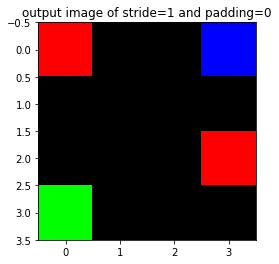

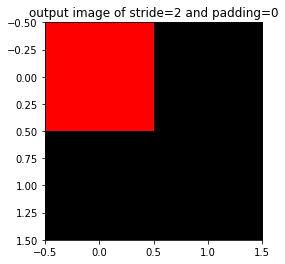

In [3]:
def task_1():
    input_img = torch.tensor([[[1., 0., 0., 1., 1.],
                                        [0., 1., 0., 0., 0.],
                                        [0., 0., 0., 1., 0.],
                                        [1., 0., 0., 0., 1.],
                                        [1., 0., 0., 0., 0.]]])
    w = torch.tensor([[[[1., 0.], [0., 1.]]],
                               [[[1., 0.], [1., 0.]]],
                               [[[1., 1.], [0., 0.]]]])
    bias = torch.tensor([-1., -1., -1.])
    conv = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=(2, 2), bias=True, )
    with torch.no_grad():
        conv.weight = nn.Parameter(w)
        conv.bias = nn.Parameter(bias)
        print("weight:", conv.weight.size(), "bias:", conv.bias.size())
        pass

    output = F.relu(conv(input_img))
    output_img = output.permute(1, 2, 0).detach().numpy()
    plt.imshow(output_img)
    plt.title("output image of stride=1 and padding=0")
    plt.show()

    conv.stride = 2
    output = F.relu(conv(input_img))
    output_img = output.permute(1, 2, 0).detach().numpy()
    plt.imshow(output_img)
    plt.title("output image of stride=2 and padding=0")
    plt.show()


task_1()

### Task 2: Receptive field

1. **Calculate the receptive field of a neuron in the third layer of a CNN that consists of convolution layers with a kernel size of (3, 3) and a stride of 1. (1P)**

The receptive field of neuron in the third layer is : **7**

2. **Calculate the receptive field of a neuron in the second layer of a CNN where each convolution layer has a kernel size of (4,4) and a stride of 2. (1P)**

The receptive field of neuron in the second layer is : **10**

3. **Derive the general formula for the receptive field for a neuron in the n-th layer in terms of kernel size and stride of the relevant layers. (2P)**

The formula for feeling the field can be obtained:
$$
r_n = r_{n-1} + (k_n-1)\prod_{i = 1}^{n-1}s_i
$$
Among of them, $r_n$ and $r_{n-1}$ are the receptive fields of the n-th and n-1-th CNN layer, $k_n$ is the kernel size of n-th layer and $s_i$ the  stride of each layer

### Task 3: Classification of Mnist with CNNs

1. **CNN-Architecture Complete the init method of the ConvolutionalNetwork in task2.py by setting the padding , stride and kernelsize arguments such that each layer outputs a tensor of the spatial dimension defined in the code comment. Furthermore, you need to define infeatures of the first fully connected layer. (3P)**
2. **Forwardpass and Training Implement the forward pass of the ConvolutionalNetwork by using Relu activations and the network layers
defined in the init method. Train the network for at least 3 epochs and report the test accuracy. (3P)**
3. **Batch normalization Extend the network architecture with a batch normalization layer after each convolutional layer and modify the forward pass such that batch normalization is used when the normalization attribute is true. Train the network with batch normalization, report the test accuracy and comment on the effect of batch normalization. (2P)**

In [9]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self, normalization=False):
        super().__init__()  # spatial dimension
        self.normalization = normalization  # input   output
        # convolution block
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5, 5), padding=0,
                               stride=1)  # 28x28  ->  24x24
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # 24x24  ->  12x12
        self.conv2 = nn.Conv2d(6, 16, kernel_size=(5, 5), padding=0, stride=1)  # 12x12  ->  8x8
        self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3), padding=1, stride=1)  # 8x8 -> 8x8
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # 8x8 -> 4x4
        # fully connected block

        self.fc1 = nn.Linear(in_features=32 * 16, out_features=120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        self.rule = nn.ReLU()

    def forward(self, x):
        # Implement the forward pass and use the layers in the order they were defined in the init method.
        # Use Relu as the activation function
        # Hint: you can use tensor.view() to reshape a tensor in pytorch
        #########################
        #### Your Code here  ####
        #########################
        # conv1 layer
        out = self.rule(self.conv1(x))
        # pool layer
        out = self.pool(out)
        # conv2 layer
        out = self.rule(self.conv2(out))
        # conv3 layer
        out = self.rule(self.conv3(out))
        # pool2 layer
        out = self.pool2(out)

        # reshape for the first fully connected layer
        out = out.view(16, 1, -1)
        # fc1 layer
        out = self.rule(self.fc1(out))
        # fc2 layer
        out = self.rule(self.fc2(out))
        # fc3 layer
        out = self.fc3(out)
        out = out.view(16, 10)
        return out


def get_data():
    TrainData = datasets.MNIST(root="../data", train=True, download=True, transform=transforms.ToTensor())
    TestData = datasets.MNIST(root="../data", train=False, download=True, transform=transforms.ToTensor())
    train_dataloader = DataLoader(TrainData, batch_size=16, shuffle=True)
    test_dataloader = DataLoader(TestData, batch_size=16, shuffle=False)
    return train_dataloader, test_dataloader


def class_label(prediction):
    _, predicted_class = torch.max(prediction, 1)
    return predicted_class


def train_and_eval(n_epochs, normalization=False,
                   use_gpu=False):  # if torch.cuda.is_available(), use gpu to speed up training
    ConvNet = ConvolutionalNetwork(normalization=normalization)
    Dl, testDl = get_data()

    # Using Adam optimizer with learning rate 1e-4 and otherwise default
    optimizer = optim.Adam(ConvNet.parameters(), lr=1e-3)
    criterion = nn.CrossEntropyLoss()

    if use_gpu:
        ConvNet.cuda()
        criterion.cuda()

    for epoch in range(n_epochs):
        ConvNet.train()  # train mode (matters for batchnorm layer, dropout, ...)
        for step, [example, label] in enumerate(tqdm(Dl, desc='Batch')):
            if use_gpu:
                example, label = example.cuda(), label.cuda()

            # reset gradient
            optimizer.zero_grad()
            prediction = ConvNet(example)  # todo change name
            loss = criterion(prediction, label)
            loss.backward()
            optimizer.step()

        # Now validate on the whole test set
        correct = 0
        total = 0
        for idx, [test_example, test_label] in enumerate(tqdm(testDl, desc='Test')):
            if use_gpu:
                test_example, test_label = test_example.cuda(), test_label.cuda()

            ConvNet.eval()  # eval mode (matters for batchnorm layer, dropout, ...)
            with torch.no_grad():

                test_prediction = ConvNet(test_example)
                predicted_label = class_label(test_prediction)  # todo change name
                correct += (predicted_label == test_label).sum()
                total += test_label.size(0)

        accuracy = correct / total
        print("\n *** Summary: Epoch [{} / {}]  Test Accuracy: {}***".format(epoch + 1, n_epochs, accuracy))
        torch.save(ConvNet.state_dict(), 'ConvNet{}.ckpt'.format(epoch + 1))


def task_3():
    train_and_eval(n_epochs=5, normalization=False, use_gpu=True)
    print("The result after normalization:\n")
    train_and_eval(n_epochs=5, normalization=True, use_gpu=True)


task_3()

Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

Test:   0%|          | 0/625 [00:00<?, ?it/s]


 *** Summary: Epoch [1 / 5]  Test Accuracy: 0.9751999974250793***


Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

Test:   0%|          | 0/625 [00:00<?, ?it/s]


 *** Summary: Epoch [2 / 5]  Test Accuracy: 0.9856999516487122***


Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

Test:   0%|          | 0/625 [00:00<?, ?it/s]


 *** Summary: Epoch [3 / 5]  Test Accuracy: 0.9850999712944031***


Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

Test:   0%|          | 0/625 [00:00<?, ?it/s]


 *** Summary: Epoch [4 / 5]  Test Accuracy: 0.9857999682426453***


Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

Test:   0%|          | 0/625 [00:00<?, ?it/s]


 *** Summary: Epoch [5 / 5]  Test Accuracy: 0.9828999638557434***
The result after normalization:



Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

Test:   0%|          | 0/625 [00:00<?, ?it/s]


 *** Summary: Epoch [1 / 5]  Test Accuracy: 0.979699969291687***


Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

Test:   0%|          | 0/625 [00:00<?, ?it/s]


 *** Summary: Epoch [2 / 5]  Test Accuracy: 0.9848999977111816***


Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

Test:   0%|          | 0/625 [00:00<?, ?it/s]


 *** Summary: Epoch [3 / 5]  Test Accuracy: 0.9868999719619751***


Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

Test:   0%|          | 0/625 [00:00<?, ?it/s]


 *** Summary: Epoch [4 / 5]  Test Accuracy: 0.9850999712944031***


Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

Test:   0%|          | 0/625 [00:00<?, ?it/s]


 *** Summary: Epoch [5 / 5]  Test Accuracy: 0.9860999584197998***


### Task 4: Visualizing Convolutional Weights

1. **Mnist Convolutional Filters Load the latest checkpoint of your model that you trained in the previous exercise and visualize 4 convolutional filters from the first layer. (1.5P)**
2. **Alexnet Convolutional Filters Load a pretrained alexnet checkpoint and visualize 64 convolutional filters from the first layer. (1.5P)**

The convolution filters of the trained ConvNet's first layer


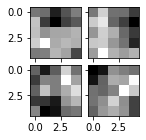

The convolution filters of the trained AlexNet's first layer


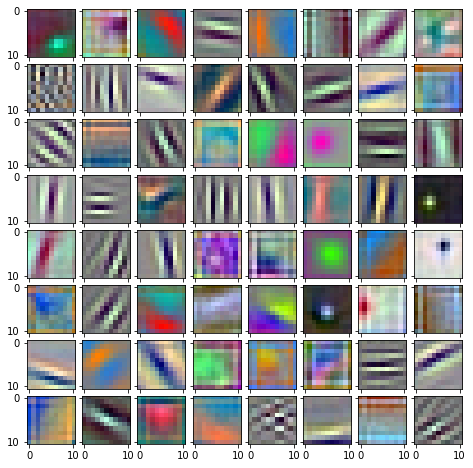

In [5]:
def min_max_normalize(tensor):
    #########################
    #### Your Code here  ####
    #########################
    d = tensor.shape[0]
    c = tensor.shape[1]
    h = tensor.shape[2]
    w = tensor.shape[3]
    tensor = tensor.view(d, -1)
    max = torch.max(tensor, 1).values.view(1, -1).t()
    min = torch.min(tensor, 1).values.view(1, -1).t()
    tensor = (tensor - min) / (max - min)
    tensor = tensor.view(d, c, h, w)
    return tensor


def plot_list_to_grid(list_of_images, nr, nc):
    fig = plt.figure(figsize=(nr, nc))
    grid = ImageGrid(fig, 111, nrows_ncols=(nr, nc), axes_pad=0.1)
    for ax, im in zip(grid, list_of_images):
        # Iterating over the grid returns the Axes.
        ax.imshow(im, cmap='gray')
    plt.show()
    plt.close()


def task_4():
    model = torch.load("ConvNet4.ckpt")
    conv_filter1 = model['conv1.weight']
    # conv_filter1 = conv_filter1.permute(0, 2, 3, 1).cpu().numpy()
    our_filters = conv_filter1[:4]
    # our_filters = our_filters.view(4, 1, -1)
    our_filters = min_max_normalize(our_filters).view(4, 1, 5, 5).permute(0, 2, 3, 1).cpu().numpy()
    print("The convolution filters of the trained ConvNet's first layer")
    plot_list_to_grid(our_filters, 2, 2)

    alexnet = torchvision.models.alexnet(pretrained=True)
    alexnet_filters = alexnet.features[0].weight.data
    alexnet_filters = min_max_normalize(alexnet_filters).permute(0, 2, 3, 1).cpu().numpy()
    print("The convolution filters of the trained AlexNet's first layer")
    plot_list_to_grid(alexnet_filters, 8, 8)
    pass

task_4()